In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = "./Data/"

### CV processing

In [9]:
def read_cv(file):
    with open(file,"r", encoding="utf8") as f:
        resume = json.load(f)
        
    title = resume['title']
    experience_text = ""
    for experience in resume['experience']:
        experience_text = experience_text + experience['title'] + experience['description']
    skills = " ".join(resume['skills'])
    
    return (file.lower(), title.lower(), experience_text.lower(), skills.lower())

In [10]:
import re
def clean_data(example):
    
    spec_chars = '[!*:@#$]'
    example = example[0], re.sub(spec_chars, '', example[1]), re.sub(spec_chars, '', example[2]), re.sub(spec_chars, '', example[3])
    return example

In [11]:
import os
from os import listdir
onlyfiles = [f for f in listdir(DATA_PATH+"cv/")]
data = []
for file in onlyfiles:
    cv = read_cv(DATA_PATH+"cv/"+file)
    data.append(clean_data(cv))
    
resume_data = pd.DataFrame(data=data,columns=['name_cv', 'title_cv', 'experience_cv', 'skills_cv'])

In [12]:
resume_data.head(5)

,name_cv,title_cv,experience_cv,skills_cv
0,./data/cv/bi1.json,senior business intelligence analyst,senior business intelligence analyst- develop ...,sql ssrs crystal reports microsoft excel busin...
1,./data/cv/bi2.json,senior business intelligence developer,senior business intelligence developercreation...,ssrs c ssis t-sql vba r sql server reporting s...
2,./data/cv/bi3.json,business intelligence architect,business intelligence architectdesigning and i...,business intelligence data warehousing report...
3,./data/cv/de1.json,data engineer,data engineerthe big data engineer programme i...,github mongodb docker maven big data analytics...
4,./data/cv/de2.json,senior big data engineer,big data scala engineerbuilding a greenfield i...,java enterprise edition spring framework sql m...


<style color="white">dsj</style>

<style color="white">dsj</style>

### Jobs Processing

In [13]:
def read_job(file):
    with open(file,"r", encoding="utf8") as f:
        job = json.load(f)
    
    title = job['title']
    description = job['description']
    
    return (file.lower(), title.lower(), description.lower())

In [14]:
# redondante 
import re
def clean_data(example):
    
    spec_chars = '[!*:@#$]'
    example = example[0], re.sub(spec_chars, '', example[1]), re.sub(spec_chars, '', example[2])
    return example

In [15]:
import os
from os import listdir
onlyfiles = [f for f in listdir(DATA_PATH+"jobs/")]
data = []
for file in onlyfiles:

    job = read_job(DATA_PATH+"jobs/"+file)
    data.append(clean_data(job))
    
job_data = pd.DataFrame(data=data,columns=['name_job', 'title_job', 'description_job'])

In [41]:
job_data.head(5)

,name_job,title_job,description_job
0,./data/jobs/bi1.json,senior manager business intelligence/data,this role is perfect for a data analysis and b...
1,./data/jobs/bi2.json,power bi developer,power bi developer power bi developer - perma...
2,./data/jobs/bi3.json,power bi developer,new power bi developer position in with one of...
3,./data/jobs/bi4.json,senior bi anayst,exciting full stack senior bi developer role -...
4,./data/jobs/de1.json,data engineer,you have experience with client projects and i...


<style color="white">dsj</style>

<style color="white">dsj</style>

### Some processing

In [42]:
resume_data['level'] = resume_data.apply(lambda x:'senior' if (x['title_cv'].find('senior') != -1 or x['experience_cv'].find('senior') != -1) else 'junior', axis =1)

In [43]:
resume_data.head(5)

,name_cv,title_cv,experience_cv,skills_cv,level
0,./data/cv/bi1.json,senior business intelligence analyst,senior business intelligence analyst- develop ...,sql ssrs crystal reports microsoft excel busin...,senior
1,./data/cv/bi2.json,senior business intelligence developer,senior business intelligence developercreation...,ssrs c ssis t-sql vba r sql server reporting s...,senior
2,./data/cv/bi3.json,business intelligence architect,business intelligence architectdesigning and i...,business intelligence data warehousing report...,junior
3,./data/cv/de1.json,data engineer,data engineerthe big data engineer programme i...,github mongodb docker maven big data analytics...,junior
4,./data/cv/de2.json,senior big data engineer,big data scala engineerbuilding a greenfield i...,java enterprise edition spring framework sql m...,senior


In [44]:
job_data['level'] = job_data.apply(lambda x:'senior' if (x['title_job'].find('senior') != -1 or x['description_job'].find('senior') != -1) else 'junior', axis =1)

In [45]:
job_data

,name_job,title_job,description_job,level
0,./data/jobs/bi1.json,senior manager business intelligence/data,this role is perfect for a data analysis and b...,senior
1,./data/jobs/bi2.json,power bi developer,power bi developer power bi developer - perma...,junior
2,./data/jobs/bi3.json,power bi developer,new power bi developer position in with one of...,senior
3,./data/jobs/bi4.json,senior bi anayst,exciting full stack senior bi developer role -...,senior
4,./data/jobs/de1.json,data engineer,you have experience with client projects and i...,junior
5,./data/jobs/de2.json,data engineer,"as a data engineer (cloud, financial, data inf...",junior
6,./data/jobs/de3.json,data engineer,we are looking for a data engineer to join our...,junior
7,./data/jobs/de4.json,associate data engineer,a bit about the role and what you'll do... be ...,junior
8,./data/jobs/ds1.json,data science,mission and main objectives to strengthen the...,junior
9,./data/jobs/ds2.json,senior data science,the economist is seeking a data scientist to j...,senior


In [46]:
# Concatenate all vectors into a panda serie -> simplify the work 
concate_dfs = pd.concat([resume_data.title_cv, resume_data.experience_cv, resume_data.skills_cv,
          job_data.title_job, job_data.description_job], 
          keys=['title_cv', 'experience_cv', 'skills_cv', 'title_job', 'description_job'])

In [47]:
# Calculate the occurence of each tearm 
word_vec = concate_dfs.apply(str.split).apply(pd.value_counts).fillna(0)

In [17]:
# Calculate the term frequency 
tf = word_vec.divide(np.sum(word_vec, axis=1), axis=0)

In [18]:
# Calculate idf
idf = np.log10(len(tf) / word_vec[word_vec > 0].count()) 

In [193]:
# Finally the beautiful tf_idf table
tfidf = np.multiply(tf, idf.to_frame().T)
tfidf.head()

analyst  intelligence  business    senior  developer  architect  \
title_cv 0  0.259107      0.206394  0.087114  0.135395   0.000000   0.000000   
         1  0.000000      0.206394  0.087114  0.135395   0.206394   0.000000   
         2  0.000000      0.275192  0.116152  0.000000   0.000000   0.546163   
         3  0.000000      0.000000  0.000000  0.000000   0.000000   0.000000   
         4  0.000000      0.000000  0.000000  0.135395   0.000000   0.000000   

                data  engineer       big  devops  ...  high-performers.  \
title_cv 0  0.000000  0.000000  0.000000     0.0  ...               0.0   
         1  0.000000  0.000000  0.000000     0.0  ...               0.0   
         2  0.000000  0.000000  0.000000     0.0  ...               0.0   
         3  0.111758  0.354535  0.000000     0.0  ...               0.0   
         4  0.055879  0.177268  0.198348     0.0  ...               0.0   

            swarm,  clojure/clojurescript  trade-offs  released  workflows.  \
title_cv 0     0.0                    0.0         0.0       0.0         0.0   
         1     0.0                    0.0         0.0       0.0         0.0   
         2     0.0                    0.0         0.0       0.0         0.0   
         3     0.0                    0.0         0.0       0.0         0.0   
         4     0.0                    0.0         0.0       0.0         0.0   

            refactoring  understands  estimate  back-end  
title_cv 0          0.0          0.0       0.0       0.0  
         1          0.0          0.0       0.0       0.0  
         2          0.0          0.0       0.0       0.0  
         3          0.0          0.0       0.0       0.0  
         4          0.0          0.0       0.0       0.0  

[5 rows x 3148 columns]

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

## Job_title vs CV_title

In [21]:
resume_tfidf_title = tfidf.loc['title_cv'] 
job_tfidf_title    = tfidf.loc['title_job'] 

In [22]:
similarities_title = cosine_similarity(pd.concat([resume_tfidf_title, job_tfidf_title]).reset_index(drop=True))

Text(114.0, 0.5, 'CV index')

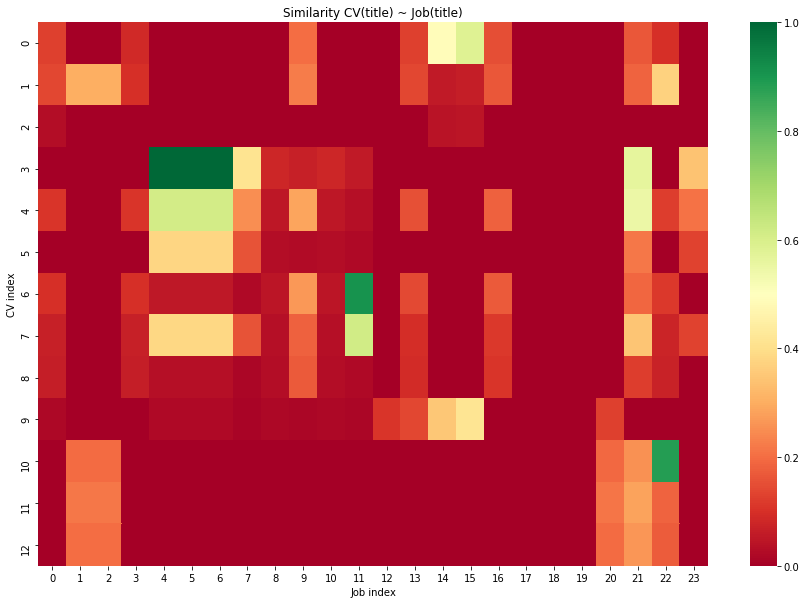

In [23]:
plt.figure(figsize =(15,10))
plt.title('Similarity CV(title) ~ Job(title)')
sns.heatmap(data=similarities_title[0:13,13:],cmap='RdYlGn')
plt.xlabel('Job index')
plt.ylabel('CV index')

As it can be seen the titles of offers and titles of resumes have an impact in the recmmendation system we're trying to build, but this is not all we can do. We can take advantage of the experiences a candidate has and the description of the offers, those two features are more important than the simple title

## Experiences vs Description

### TF_IDF

In [54]:
resume_tfidf_experience = tfidf.loc['experience_cv'] 
resume_tfidf_experience_skills = tfidf.loc['experience_cv'] + tfidf.loc['skills_cv']
job_tfidf_description    = tfidf.loc['description_job'] 

In [55]:
similarities_text = cosine_similarity(pd.concat([resume_tfidf_experience, job_tfidf_description]).reset_index(drop=True))
similarities_text_skills = cosine_similarity(pd.concat([resume_tfidf_experience_skills, job_tfidf_description]).reset_index(drop=True))

Text(964.9090909090908, 0.5, 'CV index')

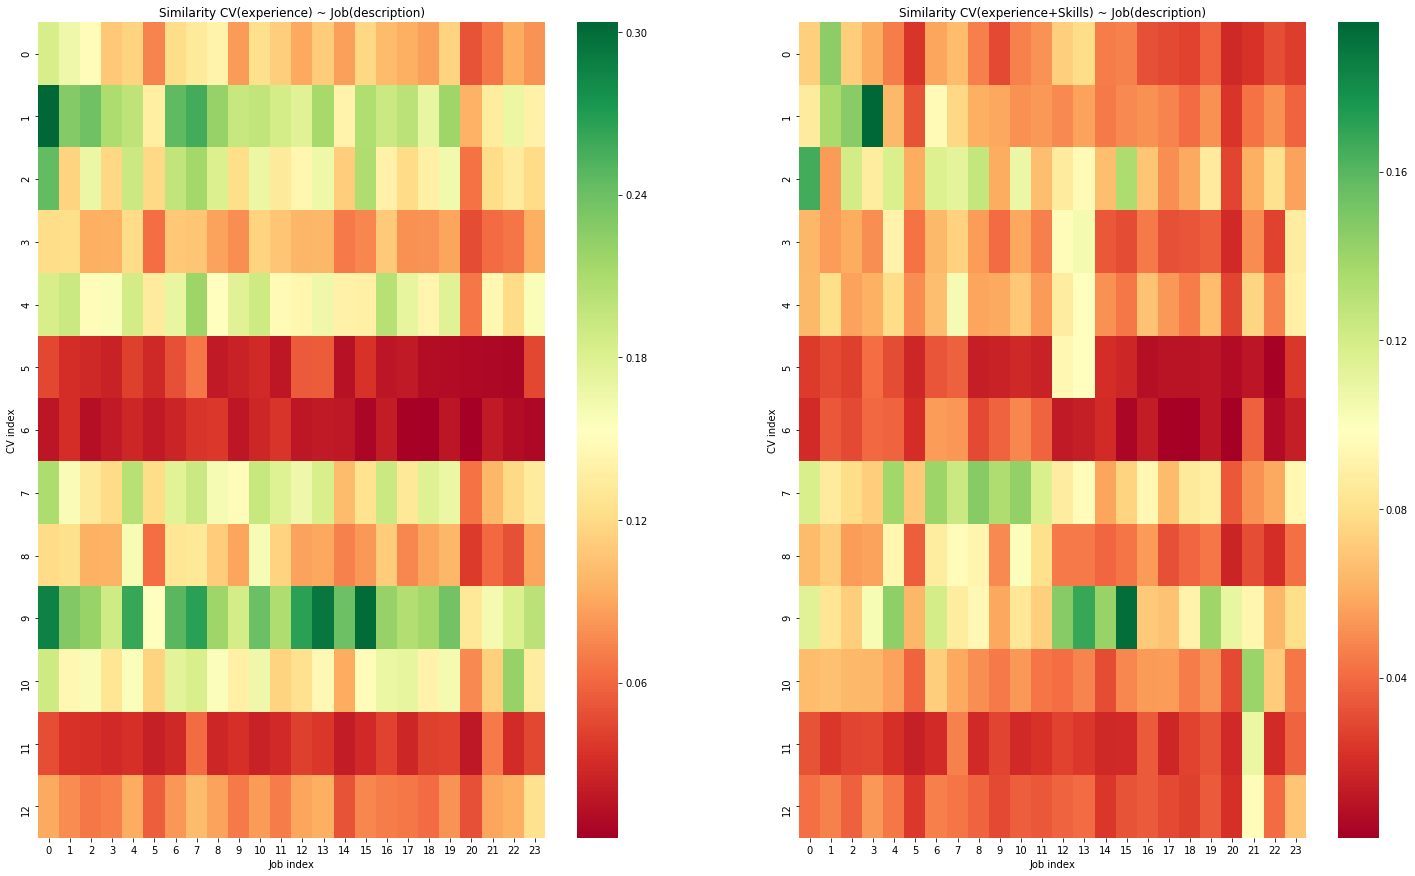

In [69]:
fig, axes = plt.subplots(1,2,figsize=[25,15])
g0 = sns.heatmap(data=similarities_text[0:13,13:], cmap='RdYlGn', ax = axes[0])
g0.set_title('Similarity CV(experience) ~ Job(description)')
g0.set_xlabel('Job index')
g0.set_ylabel('CV index')

g1 = sns.heatmap(data=similarities_text_skills[0:13,13:], cmap='RdYlGn', ax = axes[1])
g1.set_title('Similarity CV(experience+Skills) ~ Job(description)')
g1.set_xlabel('Job index')
g1.set_ylabel('CV index')

This graph is more beautiful than the previous one, but unfortunatlly, for a mathematician it means bullsh**. But why ?!!<br>
- As far as the description of an experience is long, it will have a better impact on the result (profile 5 and 6 are seniors but they don't match any offer)

So instead of using only the frequence of terms, maybe we can use the semantic of sentences 

## SUM elements

In [194]:
resume_tfidf = 0.5*tfidf.loc['title_cv'] + 0*tfidf.loc['skills_cv'] + 3*tfidf.loc['experience_cv']
job_tfidf    = 0.6*tfidf.loc['title_job'] + 3*tfidf.loc['description_job']

In [195]:
similarities = cosine_similarity(pd.concat([resume_tfidf, job_tfidf]).reset_index(drop=True))

Text(114.0, 0.5, 'CV index')

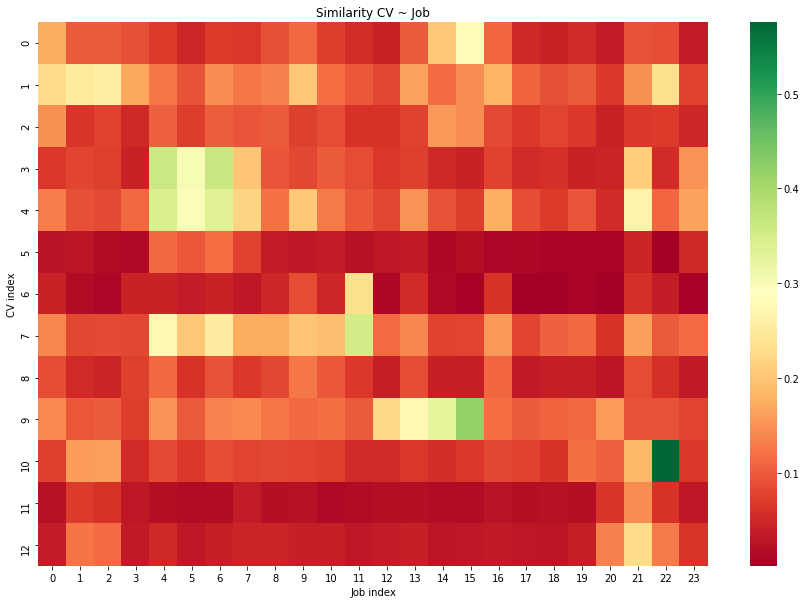

In [196]:
plt.figure(figsize =(15,10))
plt.title('Similarity CV ~ Job')
sns.heatmap(data=similarities[0:13,13:],cmap='RdYlGn')
plt.xlabel('Job index')
plt.ylabel('CV index')

In [181]:
print('The profil 3 is a \'{}\', the offers 4,5 and 6 are for \'{}\''.format(resume_data.title_cv.iloc[3],
                                                                     job_data.title_job.iloc[4] +', '+ job_data.title_job.iloc[5] +' and '+ job_data.title_job.iloc[6]))

print('The profil 6 is a \'{}\', the offer 11 for a \'{}\''.format(resume_data.title_cv.iloc[6],
                                                                     job_data.title_job.iloc[11]))

print('The profil 7 is a \'{}\', the offer 11 for a \'{}\''.format(resume_data.title_cv.iloc[7],
                                                                     job_data.title_job.iloc[11]))

print('The profil 10 is a \'{}\', the offer 22 for a \'{}\''.format(resume_data.title_cv.iloc[10],
                                                                     job_data.title_job.iloc[22]))

The profil 3 is a 'data engineer', the offers 4,5 and 6 are for 'data engineer, data engineer and data engineer'
The profil 6 is a 'senior data scientist', the offer 11 for a 'data scientist'
The profil 7 is a 'senior data scientist and machine learning engineer', the offer 11 for a 'data scientist'
The profil 10 is a 'front end web developer', the offer 22 for a 'senior front end developer'


Reliyning on a simple implementation of TF_IDF will not lead to better results, the example above illustrate some good results but we miss a lot of relevant informations

Text(964.9090909090908, 0.5, 'CV index')

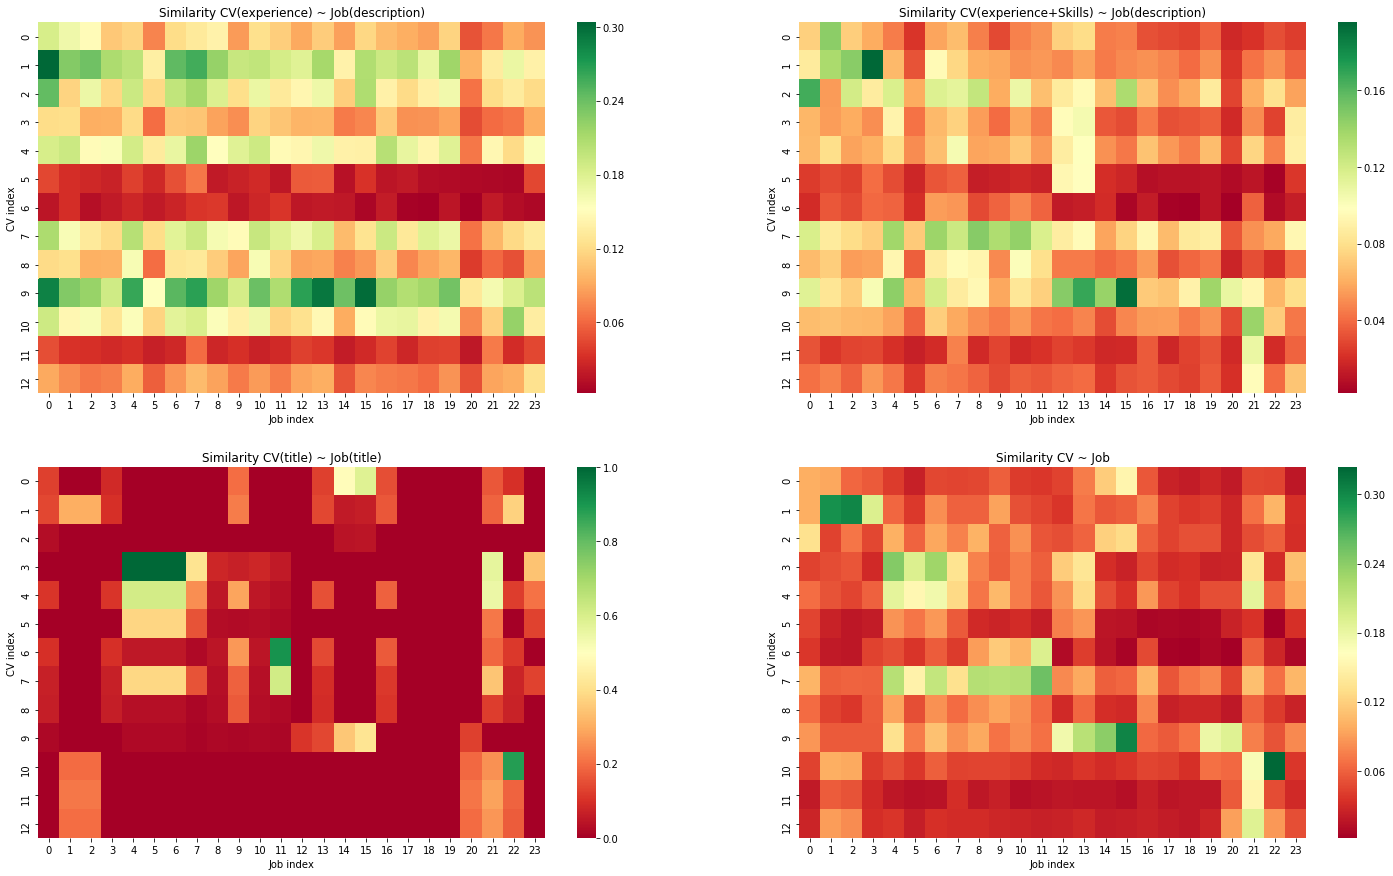

In [190]:
fig, axes = plt.subplots(2,2,figsize=[25,15])
g0 = sns.heatmap(data=similarities_text[0:13,13:], cmap='RdYlGn', ax = axes[0][0])
g0.set_title('Similarity CV(experience) ~ Job(description)')
g0.set_xlabel('Job index')
g0.set_ylabel('CV index')

g1 = sns.heatmap(data=similarities_text_skills[0:13,13:], cmap='RdYlGn', ax = axes[0][1])
g1.set_title('Similarity CV(experience+Skills) ~ Job(description)')
g1.set_xlabel('Job index')
g1.set_ylabel('CV index')

g2 = sns.heatmap(data=similarities_title[0:13,13:],cmap='RdYlGn', ax = axes[1][0])
g2.set_title('Similarity CV(title) ~ Job(title)')
g2.set_xlabel('Job index')
g2.set_ylabel('CV index')

g3 = sns.heatmap(data=similarities[0:13,13:],cmap='RdYlGn', ax = axes[1][1])
g3.set_title('Similarity CV ~ Job')
g3.set_xlabel('Job index')
g3.set_ylabel('CV index')

# Other Processing

In [16]:
def read_cv(file):
    with open(file,"r", encoding="utf8") as f:
        resume = json.load(f)
        
    title = resume['title']
    experience_text = {}
    for i,experience in enumerate(resume['experience']):
        experience_text[i] = experience['title'] + experience['description']
    skills = " ".join(resume['skills'])
    
    return (file.lower(), title.lower(), experience_text, skills.lower())

In [17]:
import os
from os import listdir
onlyfiles = [f for f in listdir(DATA_PATH+"cv/")]
resume = []
for file in onlyfiles:
    cv = read_cv(DATA_PATH+"cv/"+file)
    resume.append(cv)
    
#resume_data = pd.DataFrame(data=data,columns=['name_cv', 'title_cv', 'experience_cv', 'skills_cv'])

In [19]:
def read_job(file):
    with open(file,"r", encoding="utf8") as f:
        job = json.load(f)
    
    title = job['title']
    description = job['description']
    
    return (file.lower(), title.lower(), description.lower())

In [20]:
# redondante 
import re
def clean_data(example):
    
    spec_chars = '[!*:@#$]'
    example = example[0], re.sub(spec_chars, '', example[1]), re.sub(spec_chars, '', example[2])
    return example

In [21]:
import os
from os import listdir
onlyfiles = [f for f in listdir(DATA_PATH+"jobs/")]
jobs = []
for file in onlyfiles:

    job = read_job(DATA_PATH+"jobs/"+file)
    jobs.append(clean_data(job))
    
#job_data = pd.DataFrame(data=data,columns=['name_job', 'title_job', 'description_job'])

## Pre-trained model

Here we will use the glov pre-trained model, the dimension of the embeddings is 100, due to the memory problems we will use this tiny dimension :(

In [4]:
import numpy as np
def convert_to_binary(embedding_path):
    """
    Here, it takes path to embedding text file provided by glove.
    :param embedding_path: takes path of the embedding which is in text format or any format other than binary.
    :return: a binary file of the given embeddings which takes a lot less time to load.
    """
    f = open(embedding_path + ".txt", 'r', encoding='utf-8')
    wv = []
    with open(embedding_path + ".vocab", "w", encoding='utf-8') as vocab_write:
        count = 0
        for line in f:
            if count == 0:
                pass
            else:
                splitlines = line.split()
                vocab_write.write(splitlines[0].strip())
                vocab_write.write("\n")
                wv.append([float(val) for val in splitlines[1:]])
            count += 1
    np.save(embedding_path + ".npy", np.array(wv))

In [5]:
def load_embeddings_binary(embeddings_path):
    """
    It loads embedding provided by glove which is saved as binary file. Loading of this model is
    about  second faster than that of loading of txt glove file as model.
    :param embeddings_path: path of glove file.
    :return: glove model
    """
    print(embeddings_path)
    with open('glove.6B/glove.6B.100d.vocab', mode='r', encoding='utf-8') as f_in:
        index2word = [line.strip() for line in f_in]
    wv = np.load(embeddings_path + '.npy')
    model = {}
    for i, w in enumerate(index2word):
        model[w] = wv[i]
    return model

In [6]:
def get_w2v(sentence, model):
    """
    :param sentence: inputs a single sentences whose word embedding is to be extracted.
    :param model: inputs glove model.
    :return: returns numpy array containing word embedding of all words    in input sentence.
    """
    return np.array([model.get(val, np.zeros(100)) for val in sentence.split()], dtype=np.float64)

In [7]:
convert_to_binary('glove.6B/glove.6B.100d')

In [8]:
model = load_embeddings_binary('glove.6B/glove.6B.100d')

glove.6B/glove.6B.100d


In [120]:
result = {}
for r, pp in enumerate(resume):
    res = resume[r]
    result[r] = {}
    for e, ee in enumerate(res[2]):
        experiences = res[2]
        result[r][e] = {}
        for j,jj in enumerate(jobs):
            exper = np.sum(get_w2v(experiences[e], model),axis=0)
            jobss = np.sum(get_w2v(jobs[j][1], model), axis=0)
            dist = 1 - spatial.distance.cosine(exper, jobss)
            result[r][e][j] = dist*10 - int(dist*10)
            
data_stats = pd.DataFrame(data = result)

In [121]:
def plot_profiles(dataframe):
    shpe = dataframe.shape
    fig, axes = plt.subplots(shpe[1],shpe[0],figsize=[15,60])
    for i in range(shpe[1]):
        for j in range(shpe[0]):
            data = dataframe.iloc[j].loc[i]
            if data is not np.nan:
                sns.barplot(x = list(data.keys()), y = list(data.values()), ax = axes[i][j])
                axes[i][j].set_title(resume[i][0])
            else:
                pass
    return fig

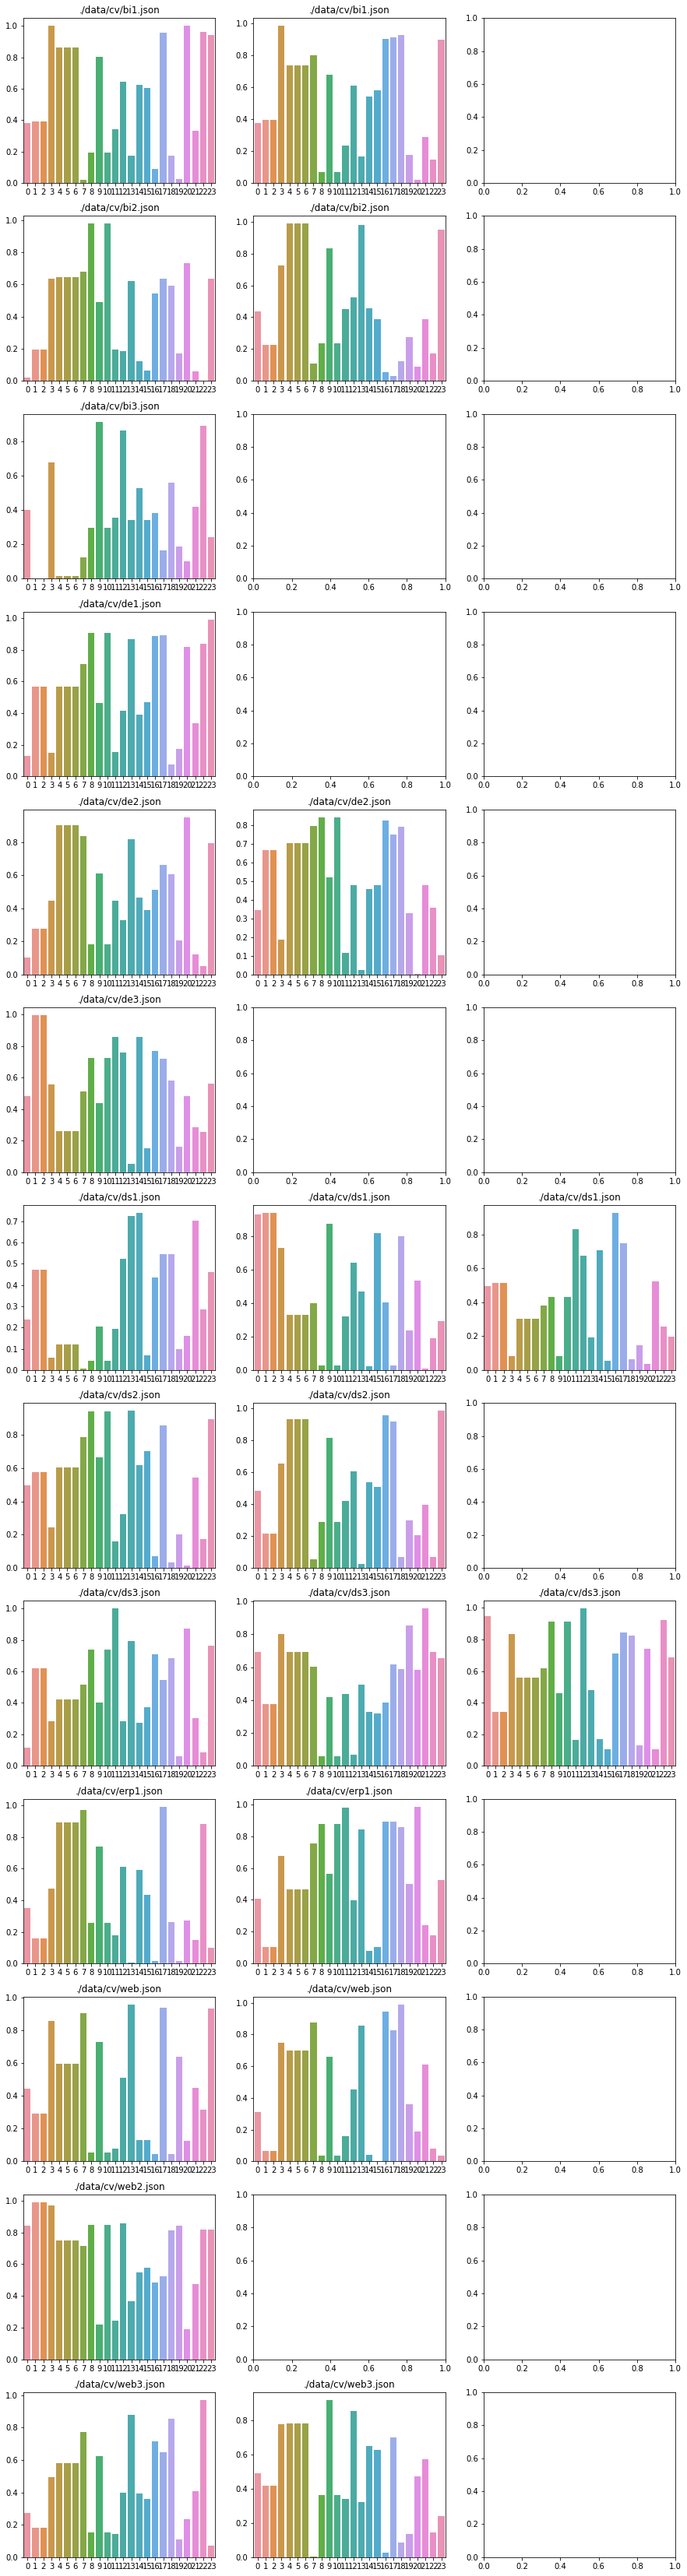

In [122]:
fig = plot_profiles(data_stats)

In [116]:
fig.savefig('yey.png')

In [49]:
resume_pre = word_vec.loc['title_cv'] + word_vec.loc['skills_cv'] + word_vec.loc['experience_cv']

In [50]:
resume_pre.head()

,intelligence,business,senior,analyst,developer,architect,engineer,data,big,&,...,reviews,bsc,understands,peers,competencies,re-implement,recently,steaming,(please,modular
0,5.0,10.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,4.0,3.0,0.0,1.0,0.0,0.0,10.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,8.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,2.0,7.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Draft

In [48]:
vects_resume = {}
for experience in resume[0][2]:
    vects_resume[experience] = np.sum(get_w2v(resume[0][2][experience], model), axis=0)

In [51]:
jobs[0][2]

"this role is perfect for a data analysis and business insights driven individual with a good understanding of key marketing disciplines in order to bring our approach to business intelligence to the next level and help the marketing team to execute holistic annual marketing plans that integrate all marketing mix elements for hult’s graduate and undergraduate programs. a good all-round knowledge and understanding of email, ppc, social, events, direct marketing, and graduate education is essential. in this role, you will play a leadership role managing a business intelligence analyst and a data specialist. you will report directly to the chief marketing officer. you will be responsible for providing key business insights and analytical solutions to the leadership team, managing dashboard developments and data visualizations, as well as defining and implementing the business intelligence strategies for the enrollment and marketing teams. it is important that you are passionate about data

In [52]:
vects_job = {}
vects_job[0] = np.sum(get_w2v(jobs[0][2], model), axis=0)

In [53]:
vects_job

{0: array([-6.78003344e+01,  8.32862016e+01,  7.81819578e+01, -2.46366783e+01,
         7.51128439e+01, -3.62727465e+01, -7.46520863e+01,  1.33470176e+01,
        -9.50141642e+01,  7.63521559e+01,  1.83161212e+01, -1.31107066e+02,
         1.39985905e+02,  1.34079787e+01,  4.90360015e+01, -9.05124704e+01,
         1.25871961e+02,  4.51976288e+01, -1.71431289e+02,  1.08053154e+02,
        -1.72051504e+01, -6.48330849e+01,  1.32037764e+02, -7.95537500e-01,
        -5.95558790e+00, -8.06339878e+01,  1.21286567e+01, -1.35456615e+02,
        -7.17283544e+01, -3.08442180e+01, -1.20729041e+02,  2.62216349e+02,
        -1.32846591e+02, -3.73960660e+01,  3.34349333e+01,  1.01204445e+02,
         4.64275640e+00,  1.25703468e+02, -5.36205347e+01, -5.92586646e+01,
        -1.49664940e+02, -1.43962048e+02,  4.03915800e-01, -1.02578803e+02,
        -8.25538340e+01,  1.43511297e+01,  7.41601737e+01, -1.16288672e+02,
        -3.94812957e+01, -3.22614427e+02,  1.08009390e+01, -8.44237711e+00,
        -

In [29]:
from scipy import spatial

In [55]:
for i in vects_resume:
    result = 1 - spatial.distance.cosine(vects_resume[i], vects_job[0])
    print(result)

0.9786356360667582
0.9672042723809033


In [62]:
vects_job = {}
vects_job[0] = np.sum(get_w2v(jobs[20][2], model), axis=0)

In [63]:
vects_job

{0: array([ -76.6243059 ,   62.2773613 ,   33.028623  ,   25.32674316,
          65.7219485 ,  -18.3295497 ,  -80.1990869 ,   58.4896605 ,
         -54.275172  ,   93.1262763 ,   17.5185787 ,  -86.5599181 ,
          79.2836565 ,  -24.0561521 ,    2.3416082 , -105.504818  ,
          69.61506   ,   52.9956141 , -109.710509  ,   71.7614732 ,
         -27.90815245,  -73.8007147 ,   99.1506518 ,  -37.8638672 ,
         -30.94419308,  -51.575075  ,   28.5588675 ,  -55.5177838 ,
         -27.4061533 ,  -16.5483252 ,  -77.702886  ,  164.7462372 ,
         -80.693701  ,  -19.13748197,   30.020918  ,   58.7796285 ,
          35.8710238 ,   54.8319234 ,  -43.621789  ,  -35.1227993 ,
        -103.12279285,  -83.4653544 ,   -2.23199629,  -46.3060677 ,
         -57.31675196,    4.0034667 ,   17.79800161,  -83.6883659 ,
         -23.19196865, -199.845326  ,    3.0558868 ,   -7.81558045,
          -6.9217744 ,  352.214062  ,    1.3795976 , -698.943525  ,
          57.7694341 , -123.3232011 ,  548.85

In [64]:
for i in vects_resume:
    result = 1 - spatial.distance.cosine(vects_resume[i], vects_job[0])
    print(result)

0.9758349103499658
0.955391576223082


In [94]:
vec_resume_job = {}
for p, profile in enumerate(resume):
    experiences = {}
    for e in profile[2]:
        for j, job in enumerate(jobs):
            exp_vec = np.sum(get_w2v(profile[2][e], model), axis=0)
            job_vec = np.sum(get_w2v(job[2], model), axis=0)
            experiences[e] = (j, 1 - spatial.distance.cosine(exp_vec, job_vec))
            
    vec_resume_job[p] = (profile[0], experiences)

In [31]:
result = {}
for r, pp in enumerate(resume):
    print(r)
    res = resume[r]
    result[r] = {}
    for e, ee in enumerate(res[2]):
        experiences = res[2]
        result[r][e] = {}
        for j,jj in enumerate(jobs):
            exper = np.sum(get_w2v(experiences[e], model),axis=0)
            jobss = np.sum(get_w2v(jobs[j][1], model), axis=0)
            result[r][e][j] = 1 - spatial.distance.cosine(exper, jobss)


0
1
2
3
4
5
6
7
8
9
10
11
12


In [32]:
result

{0: {0: {0: 0.7380313947636018,
   1: 0.639040311472416,
   2: 0.639040311472416,
   3: 0.499952271492082,
   4: 0.6861236654976289,
   5: 0.6861236654976289,
   6: 0.6861236654976289,
   7: 0.7017526337659531,
   8: 0.7195674271916342,
   9: 0.7801535555171278,
   10: 0.7195674271916342,
   11: 0.6344062474485054,
   12: 0.46452063993502246,
   13: 0.5171861795604592,
   14: 0.6626030308227244,
   15: 0.5605255432543689,
   16: 0.6090246088287888,
   17: 0.6956830713859925,
   18: 0.517298041667366,
   19: 0.70243677051535,
   20: 0.7999851723730553,
   21: 0.7331374087081314,
   22: 0.7963224274107312,
   23: 0.49434511770363454},
  1: {0: 0.7374886384264616,
   1: 0.6393984939270011,
   2: 0.6393984939270011,
   3: 0.49862953234182394,
   4: 0.6738493405063916,
   5: 0.6738493405063916,
   6: 0.6738493405063916,
   7: 0.6802124503100313,
   8: 0.7070243575266552,
   9: 0.7680709796656036,
   10: 0.7070243575266552,
   11: 0.6234147410573991,
   12: 0.46124512567911324,
   13: 0.5168

In [33]:
df = pd.DataFrame(data = result)

In [34]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"{0: 0.7380313947636018, 1: 0.639040311472416, ...","{0: 0.7019558854863002, 1: 0.6196085385338588,...","{0: 0.7399287815256737, 1: 0.6003290801138464,...","{0: 0.713148637168988, 1: 0.656522362679309, 2...","{0: 0.7101618322120079, 1: 0.6275746488431492,...","{0: 0.6483541236559196, 1: 0.4996825230524471,...","{0: 0.82384136122931, 1: 0.3471741797052077, 2...","{0: 0.7499078516199126, 1: 0.6575988290190599,...","{0: 0.7115647936168534, 1: 0.661901292379588, ...","{0: 0.7348832465239024, 1: 0.6156728225340568,...","{0: 0.7444823906034245, 1: 0.6292563015234001,...","{0: 0.6843080575346766, 1: 0.6989844698709804,...","{0: 0.727126350775477, 1: 0.6179924267611427, ..."
1,"{0: 0.7374886384264616, 1: 0.6393984939270011,...","{0: 0.7437184270116837, 1: 0.6223720292390601,...",NaN,NaN,"{0: 0.7345696884143262, 1: 0.6669425393795744,...",NaN,"{0: 0.5930339353674646, 1: 0.29365646753432484...","{0: 0.7483855643774846, 1: 0.621652121761896, ...","{0: 0.6694502334075519, 1: 0.6377801007739703,...","{0: 0.7406877740746713, 1: 0.6106068045815604,...","{0: 0.7310810017462142, 1: 0.6067205651936838,...",NaN,"{0: 0.7491246284159407, 1: 0.6417705407524799,..."
2,NaN,NaN,NaN,NaN,NaN,NaN,"{0: 0.6494268036871621, 1: 0.6512967090729813,...",NaN,"{0: 0.6948091742503868, 1: 0.634284749409536, ...",NaN,NaN,NaN,NaN


In [95]:
vec_resume_job[0]

('./data/cv/bi1.json',
 {0: (23, 0.9710198832120538), 1: (23, 0.9566941807552548)})

In [86]:
vec_resume_job[7]

('./data/cv/ds2.json',
 {0: 0.9898917816464292,
  1: 0.9881069007616945,
  2: 0.9881735673020922,
  3: 0.9845695751773832,
  4: 0.9882941749347125,
  5: 0.9864980278796214,
  6: 0.9819275766918045,
  7: 0.9880999087940268,
  8: 0.9771467541197982,
  9: 0.9839289899764694,
  10: 0.9889154005279274,
  11: 0.9873960288176611,
  12: 0.9828353224165212,
  13: 0.9849584403590242,
  14: 0.9604765963704472,
  15: 0.9880978854861572,
  16: 0.9798542567396272,
  17: 0.9805101001518488,
  18: 0.9756826264531244,
  19: 0.9836406622899623,
  20: 0.9803060123409688,
  21: 0.9812629788668187,
  22: 0.9851933463340727,
  23: 0.9849324799180167})

In [35]:
import seaborn as sns

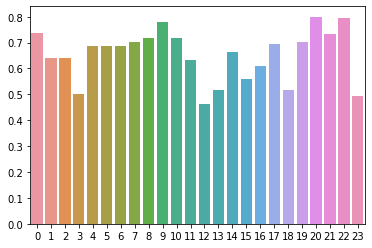

In [42]:
profile = df.iloc[0].loc[0]
sns.barplot(x = list(profile.keys()), y = list(profile.values()))

In [70]:
def plot_profiles(dataframe):
    shpe = dataframe.shape
    fig, axes = plt.subplots(shpe[1],shpe[0],figsize=[15,60])
    fig.suptitle('This is a somewhat long figure title')
    for i in range(shpe[1]):
        for j in range(shpe[0]):
            data = dataframe.iloc[j].loc[i]
            if data is not np.nan:
                sns.barplot(x = list(profile.keys()), y = list(profile.values()), ax = axes[i][j])
            else:
                pass
    return fig

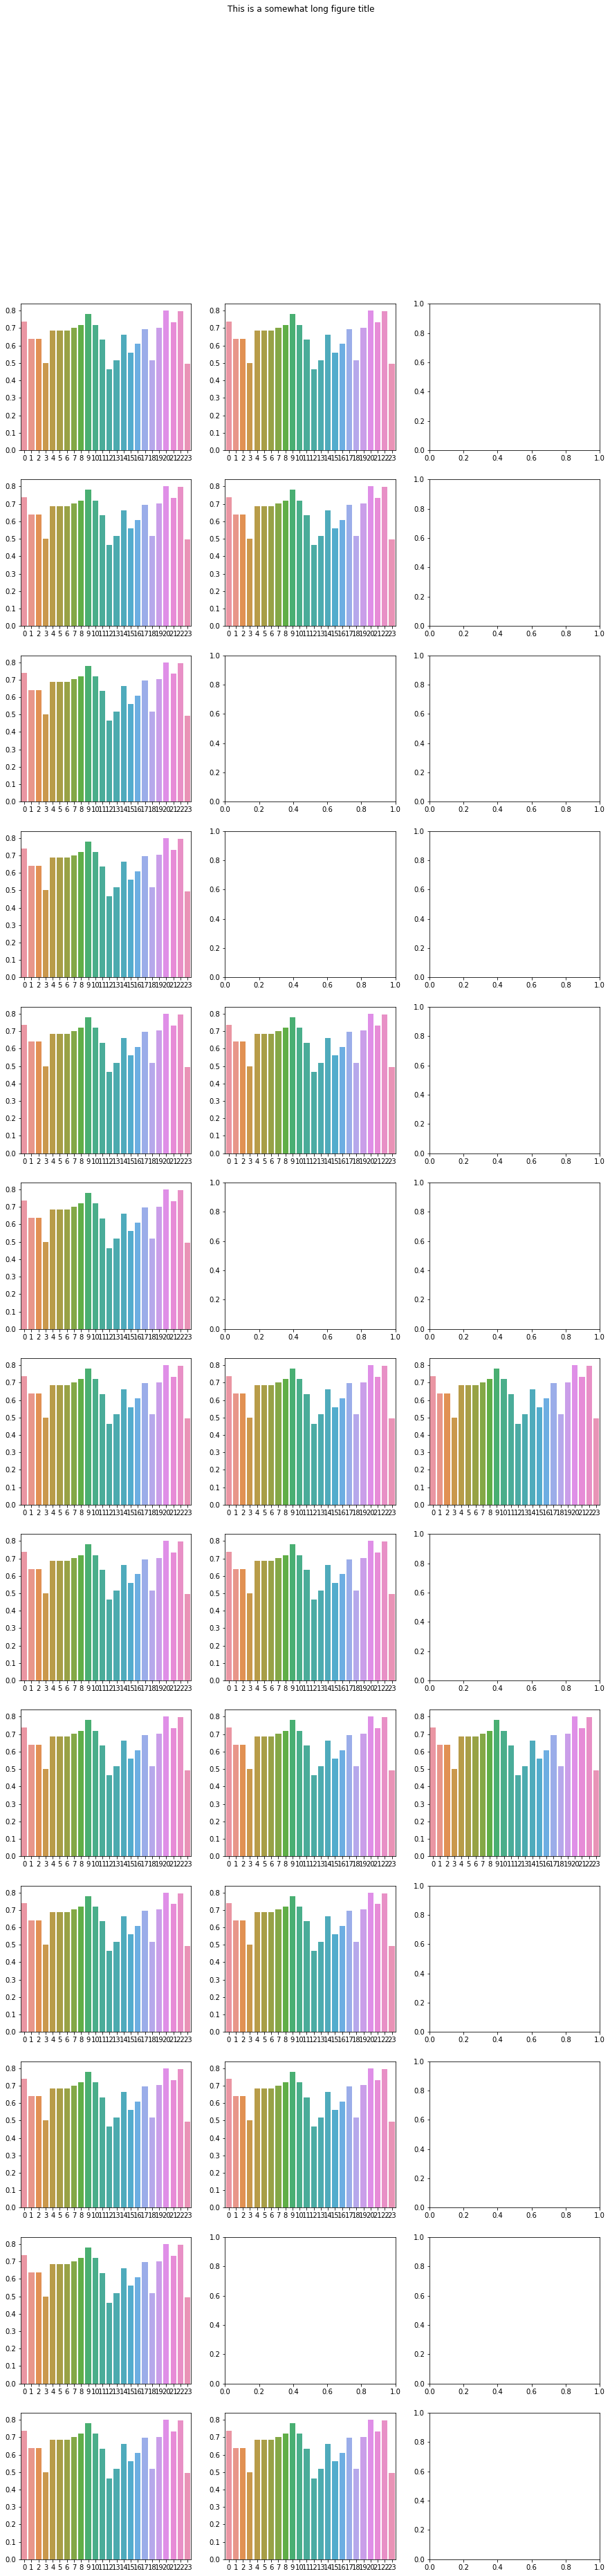

In [71]:
fig = plot_profiles(df)